In [1]:
#Versão da linguagem Python 

from platform import python_version 
print('Versão da Linguaguem Python Usada Neste Jupyter Notebook:', python_version())


Versão da Linguaguem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
#Instala o pacote watermark
# sintaxe: 
# !pip install -U nome_pacote
#Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
#Imports
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [4]:
#Versões do Pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.5.1
seaborn   : 0.11.2
numpy     : 1.21.5
pandas    : 1.4.2



In [5]:
#Carregando os dados 
dadosRH = pd.read_csv('dadosRH.csv')

In [6]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [7]:
dadosRH.shape

(54808, 11)

In [8]:
#Analise Exploratoria, limpeza e transformação dos dados 

dadosRH.isnull().sum()


id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [9]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

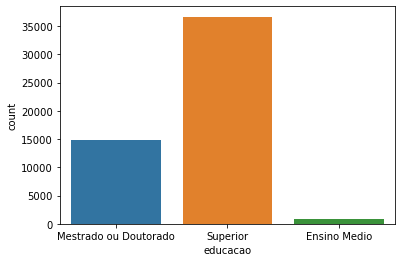

In [10]:
sns.countplot(dadosRH['educacao'])

In [11]:
dadosRH.groupby(['aval_ano_anterior']).count()
##observe que este comando não considera valores ausentes, basta comparar com a contagem de valores nulos calculado a cima. 

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

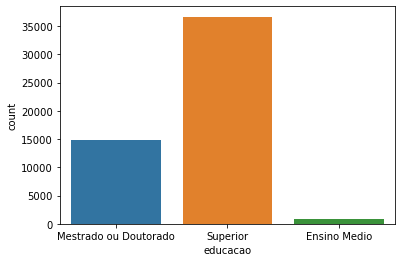

In [12]:
sns.countplot(dadosRH['educacao'])

In [13]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace=True)

In [14]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace=True)

In [15]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [16]:
dadosRH.shape

(54808, 11)

In [17]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [18]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


In [19]:
### verificar o balanceamento de classe na variavel "promovido"
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

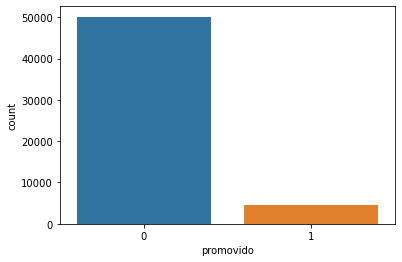

In [20]:
sns.countplot(dadosRH['promovido'])

In [21]:
# tecnica de upsample
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [22]:
df_classe_majoritaria.shape

(50140, 11)

In [23]:
df_classe_minoritaria.shape

(4668, 11)

In [24]:
##upsample da classe minoritaria
##resample = reamostragem
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria,
                                         replace = True, 
                                         n_samples = 50140,
                                         random_state = 150)


In [25]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [26]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [27]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

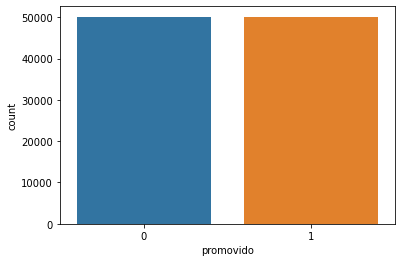

In [28]:
sns.countplot(dadosRH_balanceados['promovido'])

In [29]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding= 'utf-8', index=False)

In [30]:
dataset = pd.read_csv('dadosRH_modificado.csv')

In [31]:
dataset.head

<bound method NDFrame.head of         id_funcionario    departmento    regiao               educacao genero  \
0                65438      Marketing   Sudeste  Mestrado ou Doutorado      F   
1                65141      Logistica  Nordeste               Superior      M   
2                 7513      Marketing   Sudeste               Superior      M   
3                 2542      Marketing     Norte               Superior      M   
4                48945     Tecnologia  Nordeste               Superior      M   
...                ...            ...       ...                    ...    ...   
100275           17132      Analytics     Norte               Superior      M   
100276           75177      Logistica       Sul               Superior      M   
100277           74185      Logistica    Norte2               Superior      M   
100278            5261  Contabilidade       Sul               Superior      M   
100279           31200  Contabilidade  Nordeste  Mestrado ou Doutorado      F  

In [32]:
dataset.shape

(100280, 11)

# Primeira pergunta - qual a correlação entre os atributos dos funcionarios ?

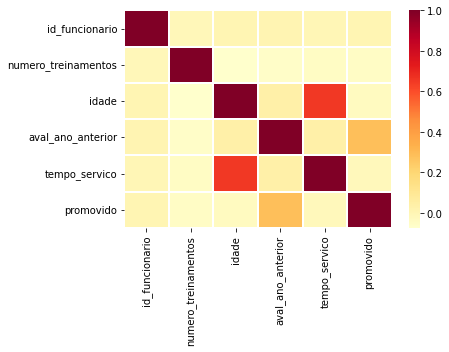

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

# Qual o Tempo de Serviço da Maioria dos Funcionários ?

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


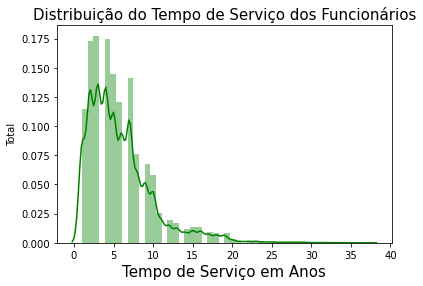

In [40]:
#import matplotlib as plt
#import seaborn as sns 
#sns.histplot(data = dataset, x="tempo_servico", color = "Green",kde = True,
#           binwidth = 5, 
#            shrink = .9).set(title = "Distribuição do Tempo de Serviço dos Funcionários", 
#                             xlabel = "Tempo de Serviços em Anos",
#                             ylabel = "Total"
#                            )

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()


# Qual Avaliação do Ano Anterior foi mais Comum ? 

<function matplotlib.pyplot.show(close=None, block=None)>

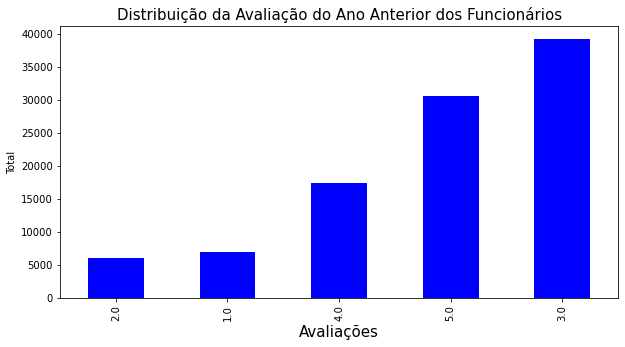

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize = (10, 5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()

# Qual a Distribuição de Idade da Maioria dos Funcionarios ? 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

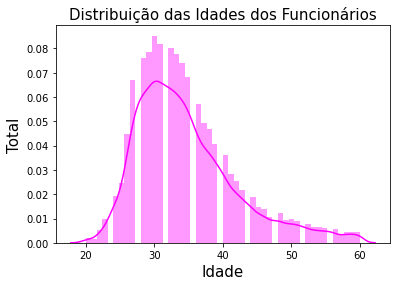

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title("Distribuição das Idades dos Funcionários", fontsize = 15)
plt.xlabel("Idade", fontsize = 15)
plt.ylabel("Total", fontsize = 15)
plt.show()

# Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

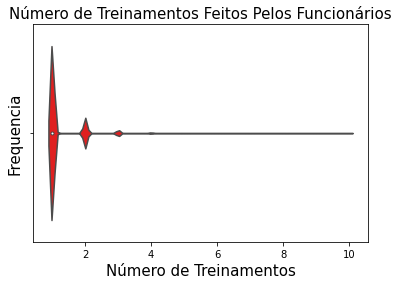

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title("Número de Treinamentos Feitos Pelos Funcionários", fontsize = 15)
plt.xlabel("Número de Treinamentos", fontsize = 15)
plt.ylabel("Frequencia", fontsize = 15)
plt.show

# Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

<function matplotlib.pyplot.show(close=None, block=None)>

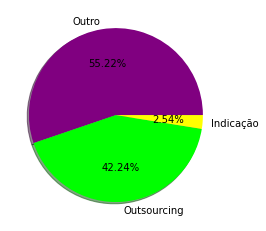

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns 
fatias = dataset['canal_recrutamento'].value_counts()
labels =  "Outro", "Outsourcing", "Indicação"
colors = ["purple", "lime", "yellow"]
explode = [0,0,0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.axis('off')
plt.show()

# Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

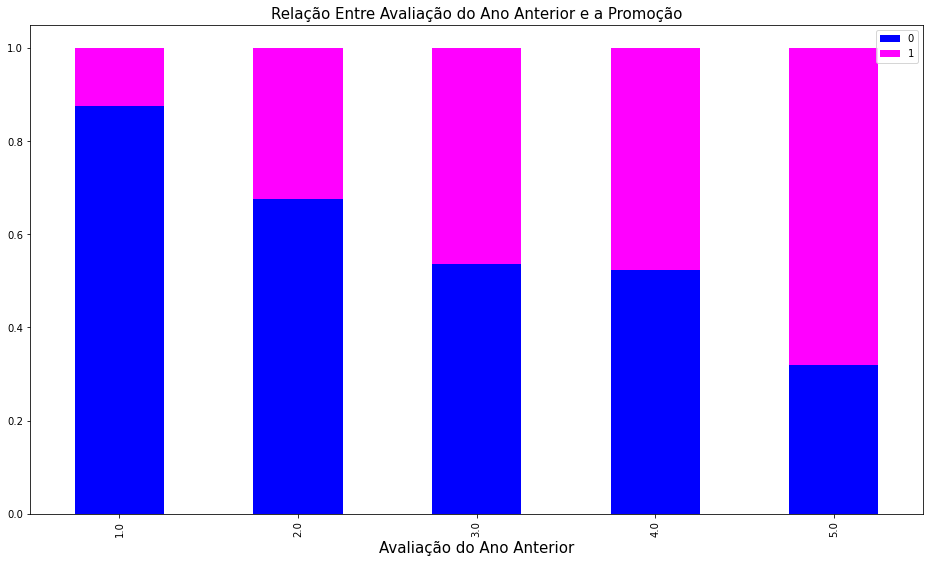

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (16, 9), 
                                                   color = ['blue', 'magenta'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()